<a href="https://colab.research.google.com/github/TheAshish07/AIML-workshop/blob/main/k_means_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


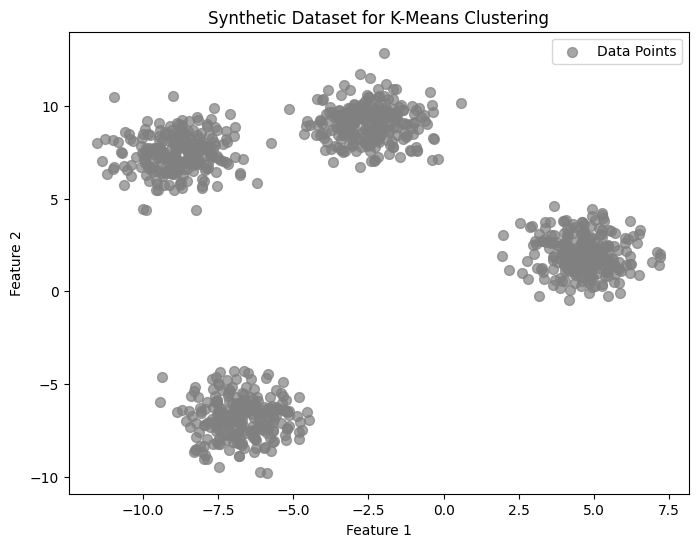

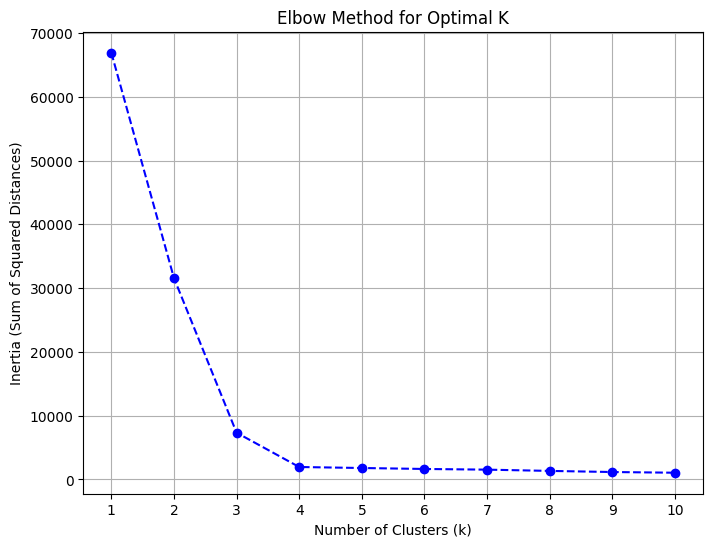

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()




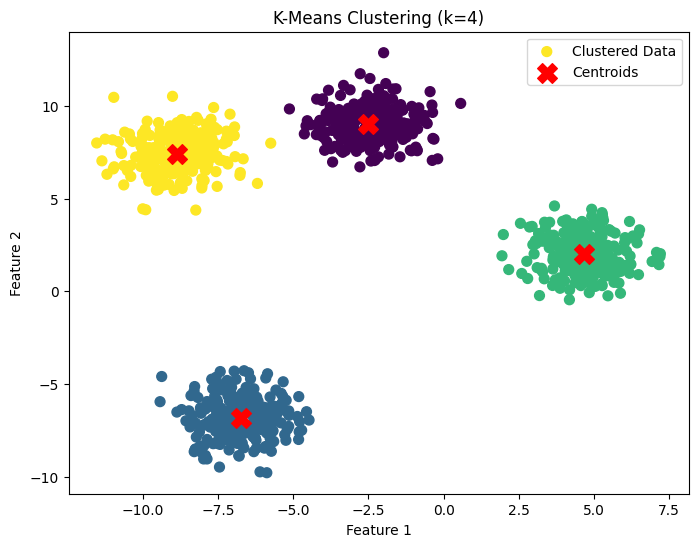

In [2]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Hierarchical

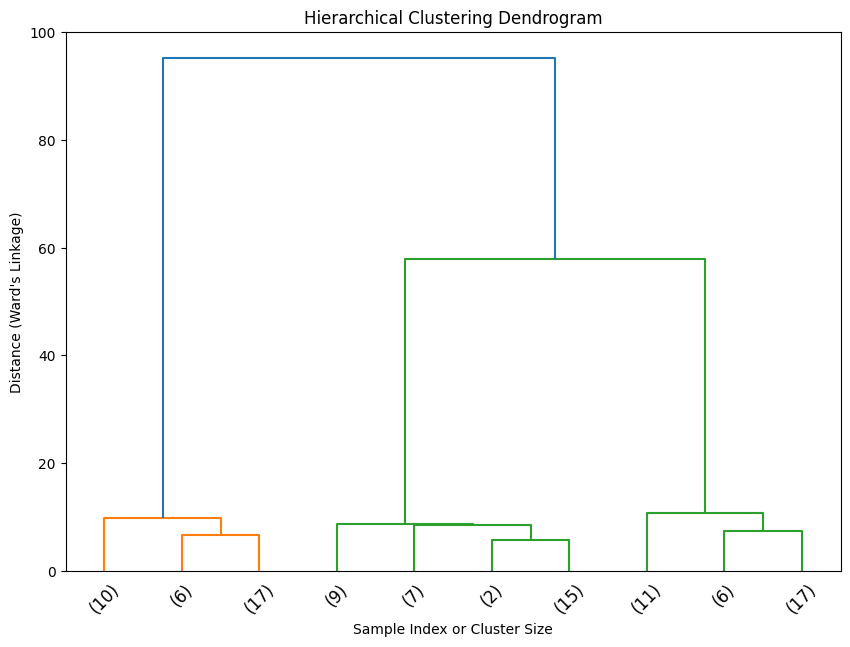

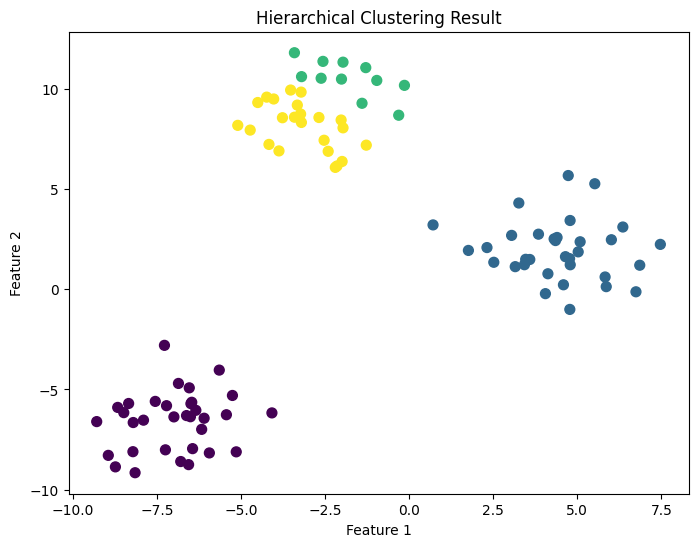

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()

# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 10
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


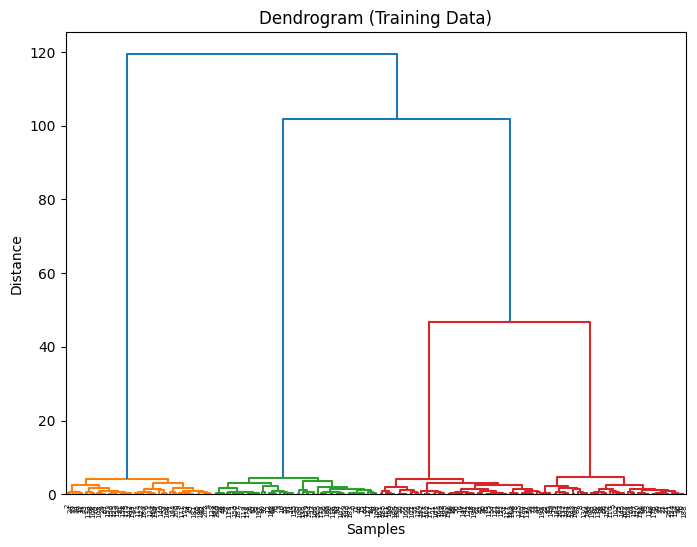

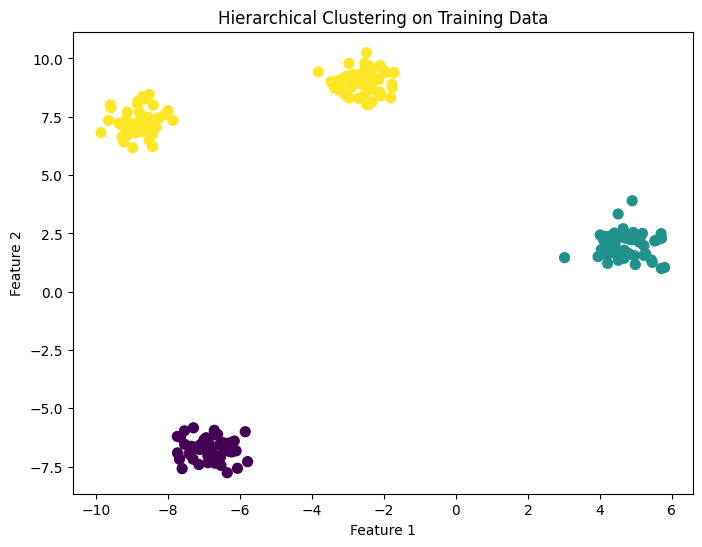

Silhouette Score for Training Data: 0.81


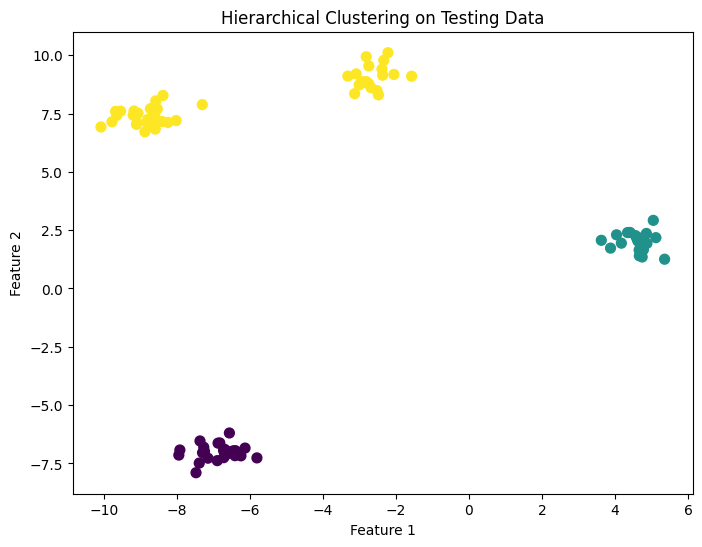

Silhouette Score for Testing Data: 0.81


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")


## **DBSCAN**

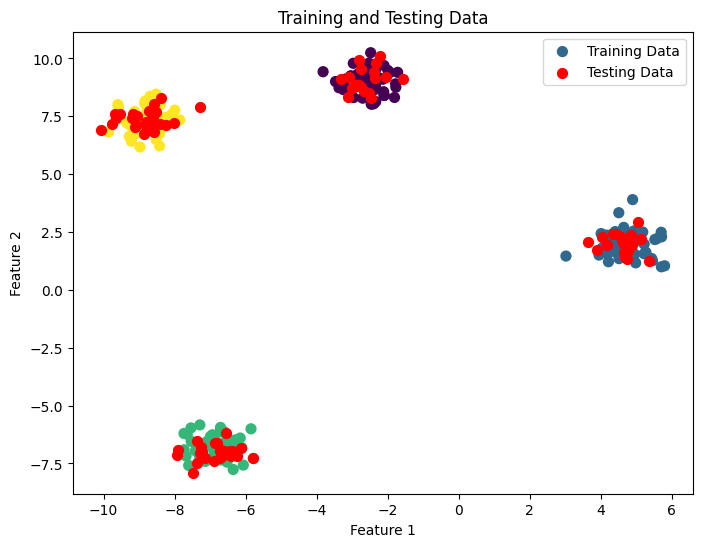

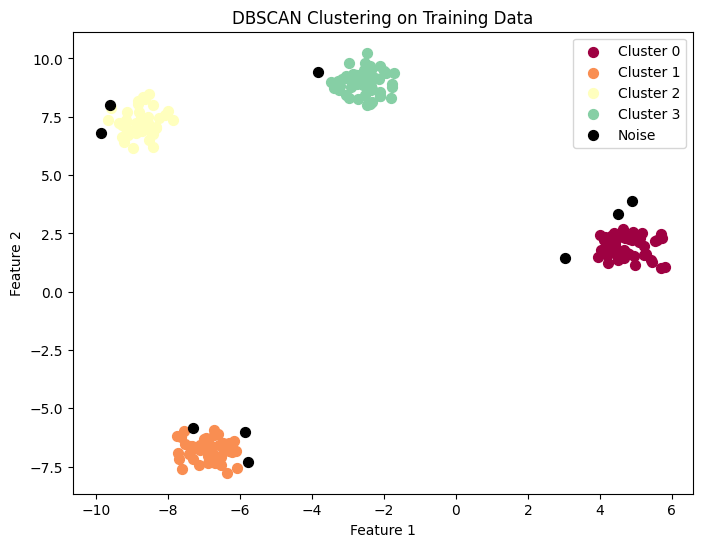

Silhouette Score for Training Data: 0.90


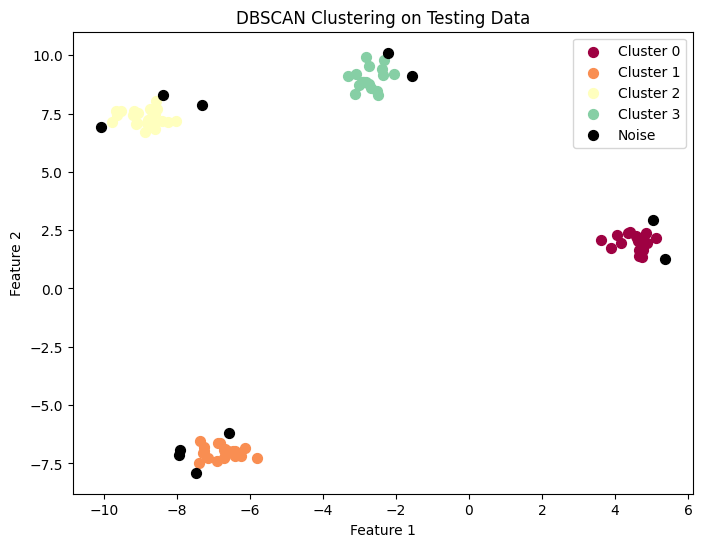

Silhouette Score for Testing Data: 0.92


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=50, label="Testing Data")
plt.title("Training and Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Apply DBSCAN on the training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: neighborhood size, min_samples: minimum points in a cluster
train_labels = dbscan.fit_predict(X_train)

# Plot DBSCAN clustering results for training data
plt.figure(figsize=(8, 6))
unique_labels = set(train_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (train_labels == k)
    xy = X_train[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on training data
core_samples_mask = (train_labels != -1)
if len(set(train_labels[core_samples_mask])) > 1:  # At least two clusters are required for silhouette score
    score = silhouette_score(X_train[core_samples_mask], train_labels[core_samples_mask])
    print(f"Silhouette Score for Training Data: {score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

# Predict clusters for the testing data
test_labels = dbscan.fit_predict(X_test)

# Plot DBSCAN clustering results for testing data
plt.figure(figsize=(8, 6))
unique_labels_test = set(test_labels)
colors_test = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_test))]

for k, col in zip(unique_labels_test, colors_test):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (test_labels == k)
    xy = X_test[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on testing data
core_samples_mask_test = (test_labels != -1)
if len(set(test_labels[core_samples_mask_test])) > 1:
    test_score = silhouette_score(X_test[core_samples_mask_test], test_labels[core_samples_mask_test])
    print(f"Silhouette Score for Testing Data: {test_score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")


# **PCA**

Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


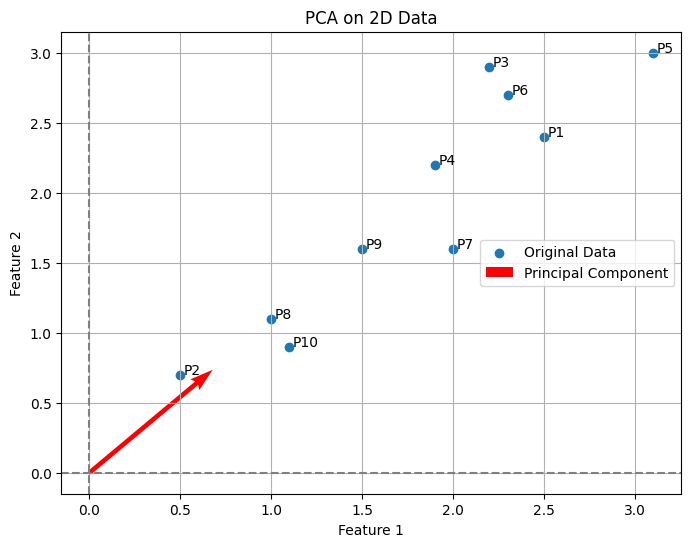

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2
